<a href="https://colab.research.google.com/github/bobyrajtamuli/Customer-Analytics/blob/main/Session_2_Hands_on_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Session 2: Hands-On Lab: AI-Powered Customer Data Collection and Management**

This hands-on lab demonstrates AI-powered customer data collection, segmentation, personalization, and predictive analytics using **Hugging Face Transformers**.

## **Step 1: Setting Up the Environment**

### **Install Necessary Libraries**

In [ ]:
!pip install pandas numpy scikit-learn tensorflow transformers torch seaborn matplotlib faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling n

### **Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from faker import Faker
from transformers import pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import torch

## **Step 2: Generate and Explore Synthetic Customer Data**

In [ ]:
fake = Faker()
sentiment_pipeline = pipeline("sentiment-analysis", model='distilbert-base-uncased-finetuned-sst-2-english')
def generate_synthetic_data(n=500):
    data = []
    for _ in range(n):
        age = np.random.randint(18, 70)
        gender = np.random.choice(['Male', 'Female'])
        income = np.random.randint(20000, 120000)
        spending_score = np.random.randint(1, 101)
        visit_frequency = np.random.randint(1, 30)
        purchase_count = np.random.randint(1, 50)
        feedback = fake.sentence()
        sentiment_score = sentiment_pipeline(feedback)[0]['score']
        data.append([fake.uuid4(), age, gender, income, spending_score, visit_frequency, purchase_count, feedback, sentiment_score])
    return pd.DataFrame(data, columns=['Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Spending_Score', 'Visit_Frequency', 'Purchase_Count', 'Feedback', 'Sentiment_Score'])

customer_data = generate_synthetic_data()
print(customer_data.head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


                            Customer_ID  Age  Gender  Annual_Income  \
0  4f88e962-96ca-4324-9ec4-e4ac77b5fabf   24  Female          80614   
1  ac0ef476-c903-4436-986d-e6387ffab48f   22    Male          73104   
2  aaa17656-5175-4b98-a01c-5d1c9a2154dd   45    Male          70878   
3  48b0f478-6685-4d12-a9f8-c190a02e0369   31  Female          85127   
4  c833b430-1747-47c8-a97b-d02cef14ca1e   31    Male         107677   

   Spending_Score  Visit_Frequency  Purchase_Count  \
0              71                8              23   
1              80               20               2   
2               9               20              38   
3              52               21              36   
4              60               12              23   

                                      Feedback  Sentiment_Score  
0  Kid run political night guess senior sense.         0.995922  
1         Receive health choice author health.         0.986694  
2  Strong sure memory ready four nearly where.    

## **Step 3: AI-Powered Data Processing & Integration**

In [ ]:
customer_data['Gender'] = customer_data['Gender'].map({'Male': 0, 'Female': 1})
scaler = StandardScaler()
numeric_cols = ['Age', 'Annual_Income', 'Spending_Score', 'Visit_Frequency', 'Purchase_Count', 'Sentiment_Score']
customer_data[numeric_cols] = scaler.fit_transform(customer_data[numeric_cols])

## **Step 4: Customer Segmentation Using AI**

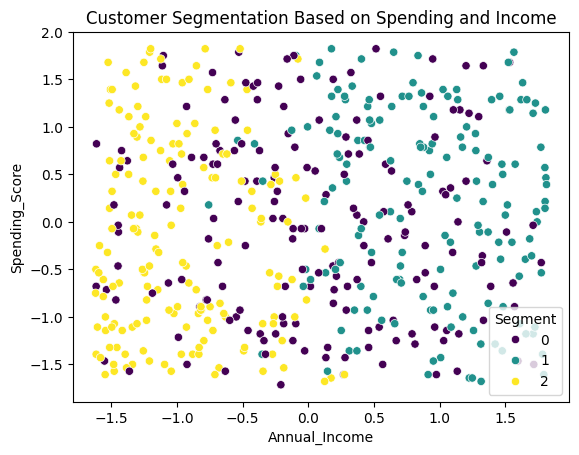

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Segment'] = kmeans.fit_predict(customer_data[numeric_cols])
sns.scatterplot(x=customer_data['Annual_Income'], y=customer_data['Spending_Score'], hue=customer_data['Segment'], palette='viridis')
plt.title("Customer Segmentation Based on Spending and Income")
plt.show()

## **Step 5: NLP using Hugging Face Transformers for Sentiment Analysis**

In [ ]:
def analyze_sentiment(text):
    return sentiment_pipeline(text)[0]['score']

customer_data['Sentiment_Score'] = customer_data['Feedback'].apply(analyze_sentiment)
print(customer_data[['Feedback', 'Sentiment_Score']].head())

                                      Feedback  Sentiment_Score
0  Kid run political night guess senior sense.         0.995922
1         Receive health choice author health.         0.986694
2  Strong sure memory ready four nearly where.         0.999625
3     Thought member force air general spring.         0.997818
4                    Camera glass never visit.         0.759693


## **Step 6: AI-Powered Personalization Using Deep Learning Transformers**

In [ ]:
X = customer_data.drop(['Customer_ID', 'Segment', 'Feedback'], axis=1)
y = customer_data['Segment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Step 7: Fine-Tune DistilBERT for Customer Segmentation**

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

# Load tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

# Tokenize customer feedback
tokenized_texts = tokenizer(customer_data['Feedback'].tolist(), padding=True, truncation=True, return_tensors="pt")

# Convert labels to tensor and ensure correct data type
labels = torch.tensor(customer_data['Segment'].values, dtype=torch.long)  # Convert to long

# Create DataLoader
dataset = TensorDataset(tokenized_texts["input_ids"], tokenized_texts["attention_mask"], labels)
train_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Define optimizer and loss function
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
loss_function = torch.nn.CrossEntropyLoss()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
model.train()
for epoch in range(3):
    for batch in train_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}: Loss = {loss.item()}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1: Loss = 1.0752134323120117
Epoch 2: Loss = 1.1555943489074707
Epoch 3: Loss = 0.7749359011650085


## **Step 8: Predict Customer Segments Using Fine-Tuned Model**

In [ ]:
model.eval()
test_texts = tokenizer(customer_data['Feedback'].tolist(), padding=True, truncation=True, return_tensors="pt")
input_ids = test_texts["input_ids"].to(device)
attention_mask = test_texts["attention_mask"].to(device)

with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
predictions = torch.argmax(outputs.logits, axis=1).cpu().numpy()
customer_data["Predicted_Segment"] = predictions

## **Step 9: Compare Actual vs. Predicted Segments**

In [ ]:
print(customer_data[['Customer_ID', 'Feedback', 'Segment', 'Predicted_Segment']].head())

                            Customer_ID  \
0  4f88e962-96ca-4324-9ec4-e4ac77b5fabf   
1  ac0ef476-c903-4436-986d-e6387ffab48f   
2  aaa17656-5175-4b98-a01c-5d1c9a2154dd   
3  48b0f478-6685-4d12-a9f8-c190a02e0369   
4  c833b430-1747-47c8-a97b-d02cef14ca1e   

                                      Feedback  Segment  Predicted_Segment  
0  Kid run political night guess senior sense.        1                  0  
1         Receive health choice author health.        1                  1  
2  Strong sure memory ready four nearly where.        0                  0  
3     Thought member force air general spring.        1                  1  
4                    Camera glass never visit.        1                  1  
